Importing libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Defining constants:

In [2]:
MACHINE_TAG = "numa" # or "cluster"
NUM_CORES = 40 if MACHINE_TAG == "cluster" else 60
LOGFILEC = f"results/{MACHINE_TAG}_word_count_log_critical.csv"
LOGFILEM = f"results/{MACHINE_TAG}_word_count_log_maps.csv"
LOGFILES = f"results/{MACHINE_TAG}_word_count_log_seq.csv"
MACHINE = f"spm{MACHINE_TAG}.unipi.it"
if MACHINE_TAG == "cluster":
    YTICKS = [0, 1, 5, 10, 15, 20, 25, 30, 35, 40]
else:
    YTICKS = [0, 1, 10, 20, 30, 40, 50, 60]

# Correctness verification

Loading error log for 'critical' implementation:

In [3]:
error_critical = pd.read_csv(f"results/{MACHINE_TAG}_error_log_critical.csv", header=None)
error_critical

,0,1,2,3,4
0,/opt/SPMcode/A2/filelist.txt,1,0,5,OK
1,/opt/SPMcode/A2/filelist.txt,1,0,5,OK
2,/opt/SPMcode/A2/filelist.txt,1,0,5,OK
3,/opt/SPMcode/A2/filelist.txt,1,0,5,OK
4,/opt/SPMcode/A2/filelist.txt,1,0,5,OK
...,...,...,...,...,...
325,/opt/SPMcode/A2/filelist.txt,60,10000,5,OK
326,/opt/SPMcode/A2/filelist.txt,60,10000,5,OK
327,/opt/SPMcode/A2/filelist.txt,60,10000,5,OK
328,/opt/SPMcode/A2/filelist.txt,60,10000,5,OK


Check for 'NOK':

In [4]:
error_critical[4].unique()

array(['OK'], dtype=object)

No errors found.

Loading error log for 'maps' implementation:

In [5]:
error_map = pd.read_csv(f"results/{MACHINE_TAG}_error_log_critical.csv", header=None)
error_map

,0,1,2,3,4
0,/opt/SPMcode/A2/filelist.txt,1,0,5,OK
1,/opt/SPMcode/A2/filelist.txt,1,0,5,OK
2,/opt/SPMcode/A2/filelist.txt,1,0,5,OK
3,/opt/SPMcode/A2/filelist.txt,1,0,5,OK
4,/opt/SPMcode/A2/filelist.txt,1,0,5,OK
...,...,...,...,...,...
325,/opt/SPMcode/A2/filelist.txt,60,10000,5,OK
326,/opt/SPMcode/A2/filelist.txt,60,10000,5,OK
327,/opt/SPMcode/A2/filelist.txt,60,10000,5,OK
328,/opt/SPMcode/A2/filelist.txt,60,10000,5,OK


Check for 'NOK':

In [6]:
error_critical[4].unique()

array(['OK'], dtype=object)

No errors found.

# Performance analysis

Loading the data:

In [7]:
seq_data = pd.read_csv(LOGFILES, header=None)
seq_data.columns = ["extra_time", "computing_time", "sorting_time"]
seq_data["reduce_time"] = 0
seq_data["map_time"] = 0
seq_data["implementation"] = "sequential"
seq_data["T"] = 1
# reordering columns
seq_data = seq_data[["implementation", "T", "extra_time", "map_time", "reduce_time", "sorting_time", "computing_time"]]
seq_data

,implementation,T,extra_time,map_time,reduce_time,sorting_time,computing_time
0,sequential,1,0,0,0,0.179935,6.04336
1,sequential,1,0,0,0,0.183073,6.08730
2,sequential,1,0,0,0,0.179825,6.35714
3,sequential,1,0,0,0,0.183224,5.92658
4,sequential,1,0,0,0,0.180571,5.96092
5,sequential,1,0,0,0,0.182289,5.96764
6,sequential,1,0,0,0,0.180542,5.92224
7,sequential,1,0,0,0,0.182395,6.08426
8,sequential,1,0,0,0,0.180535,5.86170
9,sequential,1,0,0,0,0.183246,5.93012


In [8]:
critical_data = pd.read_csv(LOGFILEC, header=None)
critical_data.columns = ["extra_time", "T", "map_time", "sorting_time"]
critical_data["reduce_time"] = 0
critical_data["implementation"] = "critical"
# reordering columns
critical_data = critical_data[["implementation", "T", "extra_time", "map_time", "reduce_time", "sorting_time"]]
critical_data

,implementation,T,extra_time,map_time,reduce_time,sorting_time
0,critical,1,0,6.72463,0,0.183546
1,critical,1,0,7.06887,0,0.183531
2,critical,1,0,7.21268,0,0.182703
3,critical,1,0,7.22628,0,0.183191
4,critical,1,0,7.03333,0,0.182541
...,...,...,...,...,...,...
325,critical,60,10000,65.70100,0,0.208096
326,critical,60,10000,59.11570,0,0.213524
327,critical,60,10000,59.92150,0,0.212184
328,critical,60,10000,58.21590,0,0.239282


In [9]:
maps_data = pd.read_csv(LOGFILEM, header=None)
maps_data.columns = ["extra_time", "T", "map_time", "reduce_time", "sorting_time"]
maps_data["implementation"] = "maps"
# reordering columns
maps_data = maps_data[["implementation", "T", "extra_time", "map_time", "reduce_time", "sorting_time"]]
maps_data

,implementation,T,extra_time,map_time,reduce_time,sorting_time
0,maps,1,0,6.46956,3.315510e-07,0.186457
1,maps,1,0,6.79711,2.719460e-07,0.186580
2,maps,1,0,6.82591,2.682210e-07,0.185338
3,maps,1,0,6.94637,3.427270e-07,0.183645
4,maps,1,0,6.93847,2.793970e-07,0.183375
...,...,...,...,...,...,...
325,maps,60,10000,62.81610,1.321810e+00,0.185010
326,maps,60,10000,45.59110,1.601510e+00,0.209774
327,maps,60,10000,38.74020,1.640520e+00,0.200801
328,maps,60,10000,65.10790,1.649580e+00,0.207014


In [10]:
par_data = pd.concat([critical_data, maps_data])
par_data["computing_time"] = par_data["map_time"] + par_data["reduce_time"]
data = pd.concat([seq_data, par_data])
data

,implementation,T,extra_time,map_time,reduce_time,sorting_time,computing_time
0,sequential,1,0,0.0000,0.00000,0.179935,6.04336
1,sequential,1,0,0.0000,0.00000,0.183073,6.08730
2,sequential,1,0,0.0000,0.00000,0.179825,6.35714
3,sequential,1,0,0.0000,0.00000,0.183224,5.92658
4,sequential,1,0,0.0000,0.00000,0.180571,5.96092
...,...,...,...,...,...,...,...
325,maps,60,10000,62.8161,1.32181,0.185010,64.13791
326,maps,60,10000,45.5911,1.60151,0.209774,47.19261
327,maps,60,10000,38.7402,1.64052,0.200801,40.38072
328,maps,60,10000,65.1079,1.64958,0.207014,66.75748


Comparing computational times of the sequential implementation with the parallel implementation run with a single thread:

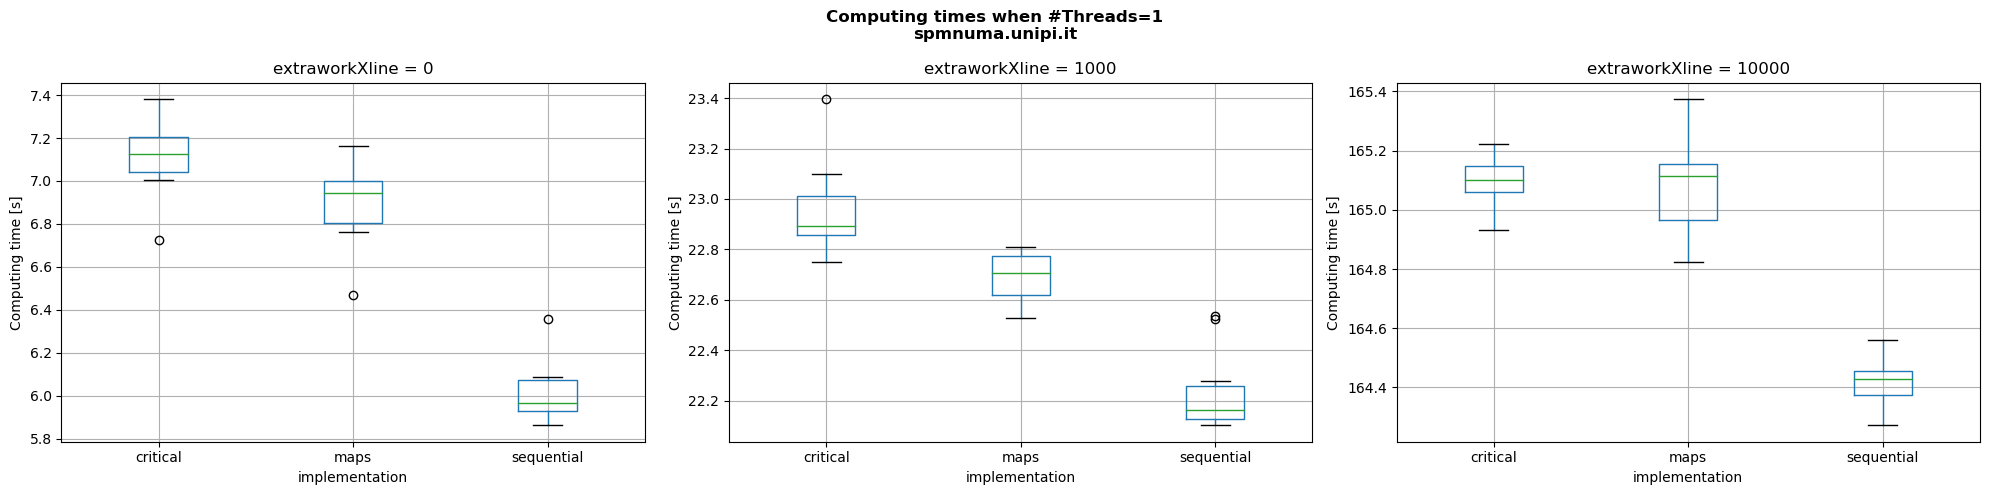

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

data[(data["extra_time"]==0)&(data["T"]==1)].boxplot(column="computing_time", by="implementation", ax=axs[0])
axs[0].set_ylabel("Computing time [s]")
axs[0].set_title("extraworkXline = 0")

data[(data["extra_time"]==1000)&(data["T"]==1)].boxplot(column="computing_time", by="implementation", ax=axs[1])
axs[1].set_ylabel("Computing time [s]")
axs[1].set_title("extraworkXline = 1000")

data[(data["extra_time"]==10000)&(data["T"]==1)].boxplot(column="computing_time", by="implementation", ax=axs[2])
axs[2].set_ylabel("Computing time [s]")
axs[2].set_title("extraworkXline = 10000")

fig.suptitle(f"Computing times when #Threads=1\n{MACHINE}", fontweight="bold");
fig.tight_layout()
fig.savefig(f"img/{MACHINE}_times_t1.png")

Visualizing timings distribution across runs:

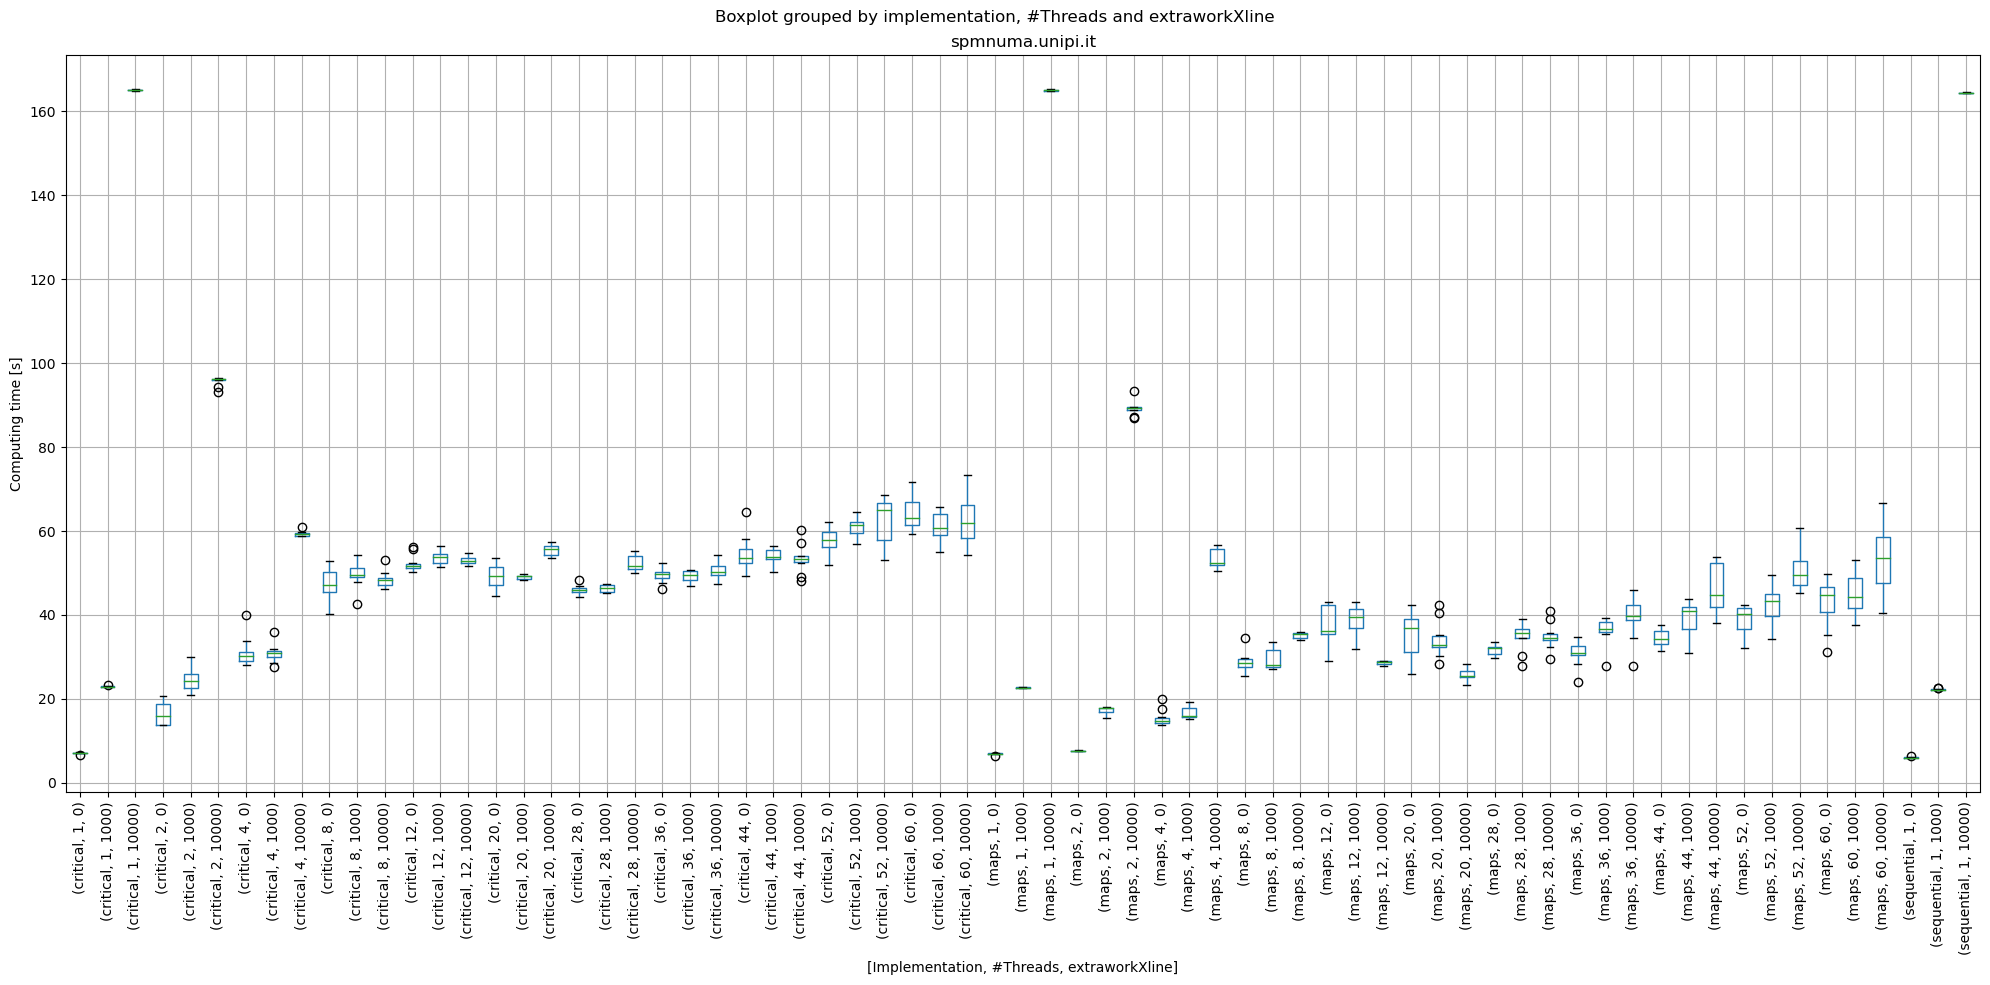

In [12]:
data.boxplot(column="computing_time", by=["implementation", "T", "extra_time"], figsize=(20, 10), rot=90)
plt.xlabel("[Implementation, #Threads, extraworkXline]");
plt.suptitle("Boxplot grouped by implementation, #Threads and extraworkXline");
plt.ylabel("Computing time [s]");
plt.title(f"{MACHINE}");
plt.tight_layout()
plt.savefig(f"img/{MACHINE_TAG}_all_times.png")

Computing the median computation time and its standard deviation:

In [13]:
data_grouped = data.groupby(["implementation", "T", "extra_time"]).agg(["mean", "median", "std"])
data_grouped

map_time                       reduce_time  \
                                    mean      median       std        mean   
implementation T  extra_time                                                 
critical       1  0             7.107326    7.123515  0.173492    0.000000   
                  1000         22.958760   22.893950  0.182657    0.000000   
                  10000       165.094300  165.099500  0.085340    0.000000   
               2  0            16.467340   15.966100  2.773524    0.000000   
                  1000         24.485260   24.310350  2.854975    0.000000   
...                                  ...         ...       ...         ...   
maps           60 1000         43.792770   43.225050  5.358784    1.233878   
                  10000        51.872460   52.395050  8.982131    1.405028   
sequential     1  0             0.000000    0.000000  0.000000    0.000000   
                  1000          0.000000    0.000000  0.000000    0.000000   
                  10000         0.000000    0.000000  0.000000    0.000000   

                                                 sorting_time            \
                                median       std         mean    median   
implementation T  extra_time                                              
critical       1  0           0.000000  0.000000     0.182956  0.182924   
                  1000        0.000000  0.000000     0.183286  0.183142   
                  10000       0.000000  0.000000     0.183052  0.183048   
               2  0           0.000000  0.000000     0.195034  0.189379   
                  1000        0.000000  0.000000     0.203651  0.198308   
...                                ...       ...          ...       ...   
maps           60 1000        1.133155  0.211903     0.190108  0.184481   
                  10000       1.328180  0.177338     0.193747  0.188107   
sequential     1  0           0.000000  0.000000     0.181564  0.181430   
                  1000        0.000000  0.000000     0.181903  0.181811   
                  10000       0.000000  0.000000     0.181784  0.181667   

                                       computing_time                        
                                   std           mean      median       std  
implementation T  extra_time                                                 
critical       1  0           0.000380       7.107326    7.123515  0.173492  
                  1000        0.001241      22.958760   22.893950  0.182657  
                  10000       0.000411     165.094300  165.099500  0.085340  
               2  0           0.011229      16.467340   15.966100  2.773524  
                  1000        0.017625      24.485260   24.310350  2.854975  
...                                ...            ...         ...       ...  
maps           60 1000        0.010780      45.026648   44.334380  5.403368  
                  10000       0.010916      53.277488   53.685670  8.924382  
sequential     1  0           0.001408       6.014126    5.964280  0.141491  
                  1000        0.000584      22.231550   22.163050  0.164918  
                  10000       0.000582     164.418100  164.430000  0.078144  

[69 rows x 12 columns]

Visualizing reduce time for the parallel implementation using a map for each thread:

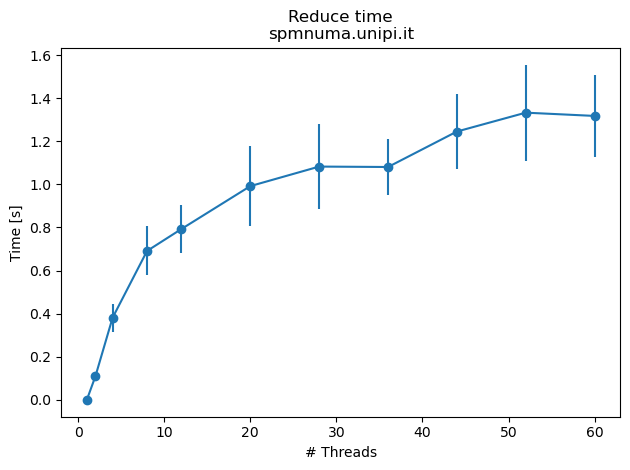

In [14]:
data.groupby(["implementation", "T"]).agg(["mean", "std"]).loc["maps"]["reduce_time"].plot(y="mean", yerr="std", marker="o")
plt.gca().get_legend().remove()
plt.xlabel("# Threads")
plt.ylabel("Time [s]")
plt.title(f"Reduce time\n{MACHINE}");
plt.tight_layout()
plt.savefig(f"img/{MACHINE_TAG}_reduce_time.png")

Computing performance metrics:

In [15]:
def compute_metrics(df, seq_time, t1_time):
    speedup = seq_time / df["computing_time"]["median"]
    speedup.name = "speedup"

    cost = df["computing_time"]["median"]*df.index.get_level_values("T")
    cost.name = "cost"

    scalability = t1_time / df["computing_time"]["median"]
    scalability.name = "scalability"

    metrics_df = pd.concat([
        df.index.get_level_values("T").to_series(),
        speedup,
        cost,
        scalability,
        ],
        axis=1
    )

    metrics_df["efficiency"] = metrics_df["speedup"] / metrics_df["T"]

    return metrics_df

In [16]:
seq_time_0 = data_grouped.loc["sequential", 1, 0]["computing_time"]["median"]
seq_time_1000 = data_grouped.loc["sequential", 1, 1000]["computing_time"]["median"]
seq_time_10000 = data_grouped.loc["sequential", 1, 10000]["computing_time"]["median"]

maps_t1_time_0 = data_grouped.loc["maps", 1, 0]["computing_time"]["median"]
maps_0_df = compute_metrics(data_grouped.loc["maps", :, 0], seq_time_0, maps_t1_time_0)
maps_t1_time_1000 = data_grouped.loc["maps", 1, 1000]["computing_time"]["median"]
maps_1000_df = compute_metrics(data_grouped.loc["maps", :, 1000], seq_time_1000, maps_t1_time_1000)
maps_t1_time_10000 = data_grouped.loc["maps", 1, 10000]["computing_time"]["median"]
maps_10000_df = compute_metrics(data_grouped.loc["maps", :, 10000], seq_time_10000, maps_t1_time_10000)

critical_t1_time_0 = data_grouped.loc["critical", 1, 0]["computing_time"]["median"]
critical_0_df = compute_metrics(data_grouped.loc["critical", :, 0], seq_time_0, critical_t1_time_0)
critical_t1_time_1000 = data_grouped.loc["critical", 1, 1000]["computing_time"]["median"]
critical_1000_df = compute_metrics(data_grouped.loc["critical", :, 1000], seq_time_1000, critical_t1_time_1000)
critical_t1_time_10000 = data_grouped.loc["critical", 1, 10000]["computing_time"]["median"]
critical_10000_df = compute_metrics(data_grouped.loc["critical", :, 10000], seq_time_10000, critical_t1_time_10000)

Plotting time:

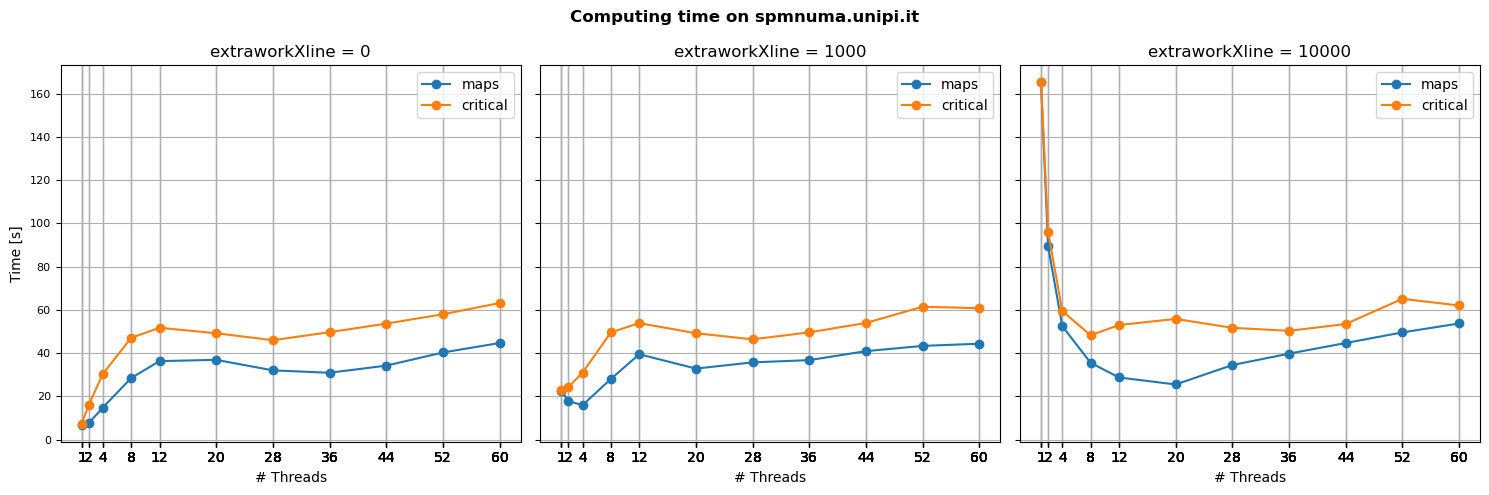

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

data_grouped.loc["maps", :, 0]["computing_time"]["median"].plot(
    ax=axs[0],
    label="maps",
    style="o-"
)
data_grouped.loc["critical", :, 0]["computing_time"]["median"].plot(
    ax=axs[0],
    label="critical",
    style="o-"
)
axs[0].set_xlabel("# Threads")
axs[0].set_ylabel("Time [s]")
axs[0].set_xticks(data_grouped.index.get_level_values("T").to_list());
for label in axs[0].get_yticklabels():
    label.set_fontsize(8)
axs[0].legend()
axs[0].grid()
axs[0].set_title(f"extraworkXline = 0")

data_grouped.loc["maps", :, 1000]["computing_time"]["median"].plot(
    ax=axs[1],
    label="maps",
    style="o-"
)
data_grouped.loc["critical", :, 1000]["computing_time"]["median"].plot(
    ax=axs[1],
    label="critical",
    style="o-"
)
axs[1].set_xlabel("# Threads")
axs[1].set_ylabel("Time [s]")
axs[1].set_xticks(data_grouped.index.get_level_values("T").to_list());
for label in axs[1].get_yticklabels():
    label.set_fontsize(8)
axs[1].legend()
axs[1].grid()
axs[1].set_title(f"extraworkXline = 1000")

data_grouped.loc["maps", :, 10000]["computing_time"]["median"].plot(
    ax=axs[2],
    label="maps",
    style="o-"
)
data_grouped.loc["critical", :, 10000]["computing_time"]["median"].plot(
    ax=axs[2],
    label="critical",
    style="o-"
)
axs[2].set_xlabel("# Threads")
axs[2].set_ylabel("Time [s]")
axs[2].set_xticks(data_grouped.index.get_level_values("T").to_list());
for label in axs[2].get_yticklabels():
    label.set_fontsize(8)
axs[2].legend()
axs[2].grid()
axs[2].set_title(f"extraworkXline = 10000")

fig.suptitle(f"Computing time on {MACHINE}", fontweight="bold")
fig.tight_layout()
fig.savefig(f"img/{MACHINE_TAG}_time.png")

Plotting speedup:

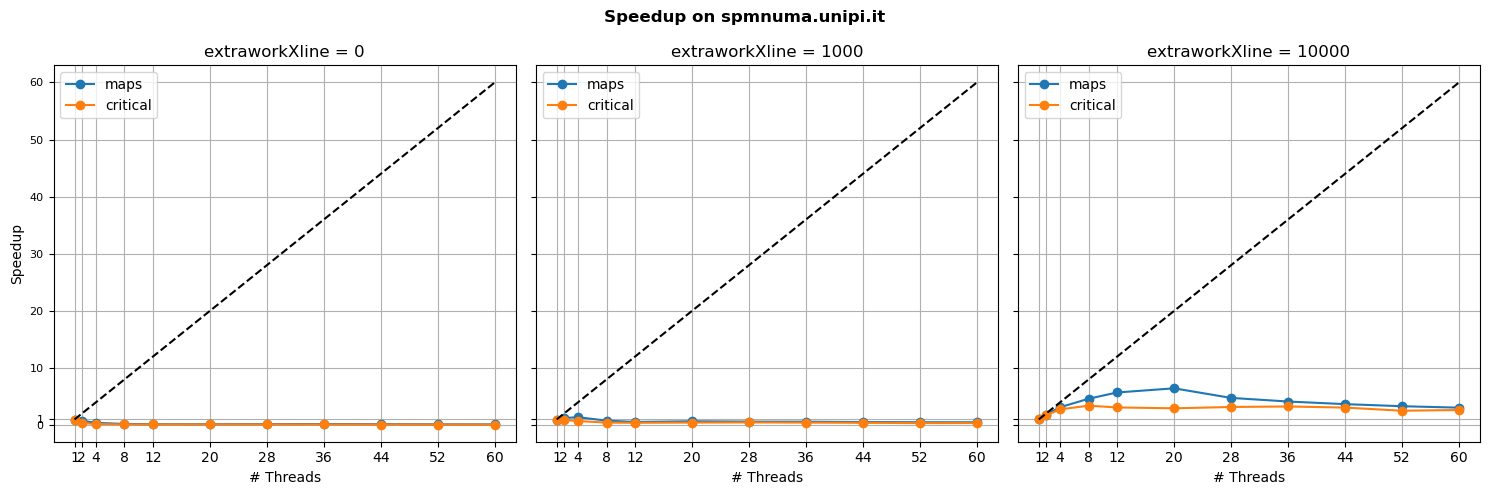

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

maps_0_df.plot(x="T", y="speedup", label="maps", style='o-', ax=axs[0])
critical_0_df.plot(x="T", y="speedup", label="critical", style='o-', ax=axs[0])
axs[0].plot(
    maps_0_df.index.get_level_values("T").to_list(),
    maps_0_df.index.get_level_values("T").to_list(),
    "k--"
)
axs[0].set_xlabel("# Threads")
axs[0].set_ylabel("Speedup")
axs[0].set_xticks(maps_0_df.index.get_level_values("T").to_list());
axs[0].set_yticks(YTICKS);
for label in axs[0].get_yticklabels():
    label.set_fontsize(8)
axs[0].grid()
axs[0].set_title(f"extraworkXline = 0")

maps_1000_df.plot(x="T", y="speedup", label="maps", style='o-', ax=axs[1])
critical_1000_df.plot(x="T", y="speedup", label="critical", style='o-', ax=axs[1])
axs[1].plot(
    maps_1000_df.index.get_level_values("T").to_list(),
    maps_1000_df.index.get_level_values("T").to_list(),
    "k--"
)
axs[1].set_xlabel("# Threads")
axs[1].set_ylabel("Speedup")
axs[1].set_xticks(maps_1000_df.index.get_level_values("T").to_list());
axs[1].set_yticks(YTICKS);
for label in axs[1].get_yticklabels():
    label.set_fontsize(8)
axs[1].grid()
axs[1].set_title(f"extraworkXline = 1000")

maps_10000_df.plot(x="T", y="speedup", label="maps", style='o-', ax=axs[2])
critical_10000_df.plot(x="T", y="speedup", label="critical", style='o-', ax=axs[2])
axs[2].plot(
    maps_10000_df.index.get_level_values("T").to_list(),
    maps_10000_df.index.get_level_values("T").to_list(),
    "k--"
)
axs[2].set_xlabel("# Threads")
axs[2].set_ylabel("Speedup")
axs[2].set_xticks(maps_10000_df.index.get_level_values("T").to_list());
axs[2].set_yticks(YTICKS);
for label in axs[2].get_yticklabels():
    label.set_fontsize(8)
axs[2].grid()
axs[2].set_title(f"extraworkXline = 10000")

fig.suptitle(f"Speedup on {MACHINE}", fontweight="bold")
fig.tight_layout()
fig.savefig(f"img/{MACHINE_TAG}_speedup.png")

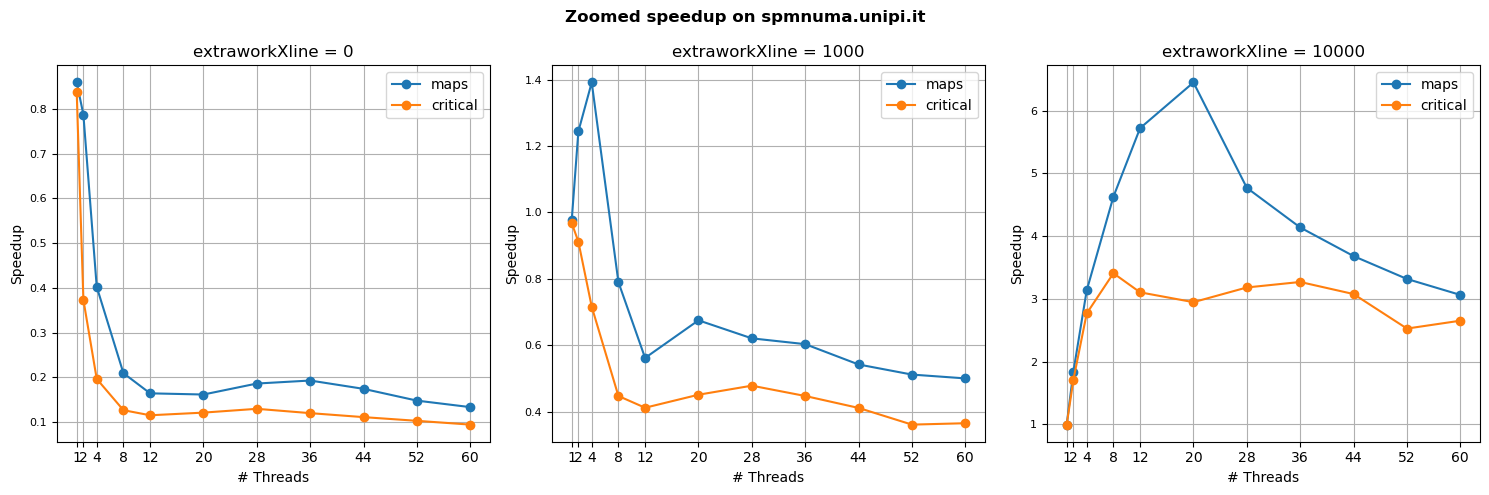

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

maps_0_df.plot(x="T", y="speedup", label="maps", style='o-', ax=axs[0])
critical_0_df.plot(x="T", y="speedup", label="critical", style='o-', ax=axs[0])
axs[0].set_xlabel("# Threads")
axs[0].set_ylabel("Speedup")
axs[0].set_xticks(maps_0_df.index.get_level_values("T").to_list());
for label in axs[0].get_yticklabels():
    label.set_fontsize(8)
axs[0].grid()
axs[0].set_title(f"extraworkXline = 0")

maps_1000_df.plot(x="T", y="speedup", label="maps", style='o-', ax=axs[1])
critical_1000_df.plot(x="T", y="speedup", label="critical", style='o-', ax=axs[1])
axs[1].set_xlabel("# Threads")
axs[1].set_ylabel("Speedup")
axs[1].set_xticks(maps_1000_df.index.get_level_values("T").to_list());
for label in axs[1].get_yticklabels():
    label.set_fontsize(8)
axs[1].grid()
axs[1].set_title(f"extraworkXline = 1000")

maps_10000_df.plot(x="T", y="speedup", label="maps", style='o-', ax=axs[2])
critical_10000_df.plot(x="T", y="speedup", label="critical", style='o-', ax=axs[2])
axs[2].set_xlabel("# Threads")
axs[2].set_ylabel("Speedup")
axs[2].set_xticks(maps_10000_df.index.get_level_values("T").to_list());
for label in axs[2].get_yticklabels():
    label.set_fontsize(8)
axs[2].grid()
axs[2].set_title(f"extraworkXline = 10000")

fig.suptitle(f"Zoomed speedup on {MACHINE}", fontweight="bold")
fig.tight_layout()
fig.savefig(f"img/{MACHINE_TAG}_speedup_zoom.png")

Computing maximum speedup when extraworkXline=10000:

In [20]:
maps_10000_df["speedup"].max()

6.448899151383231

Plotting scalability:

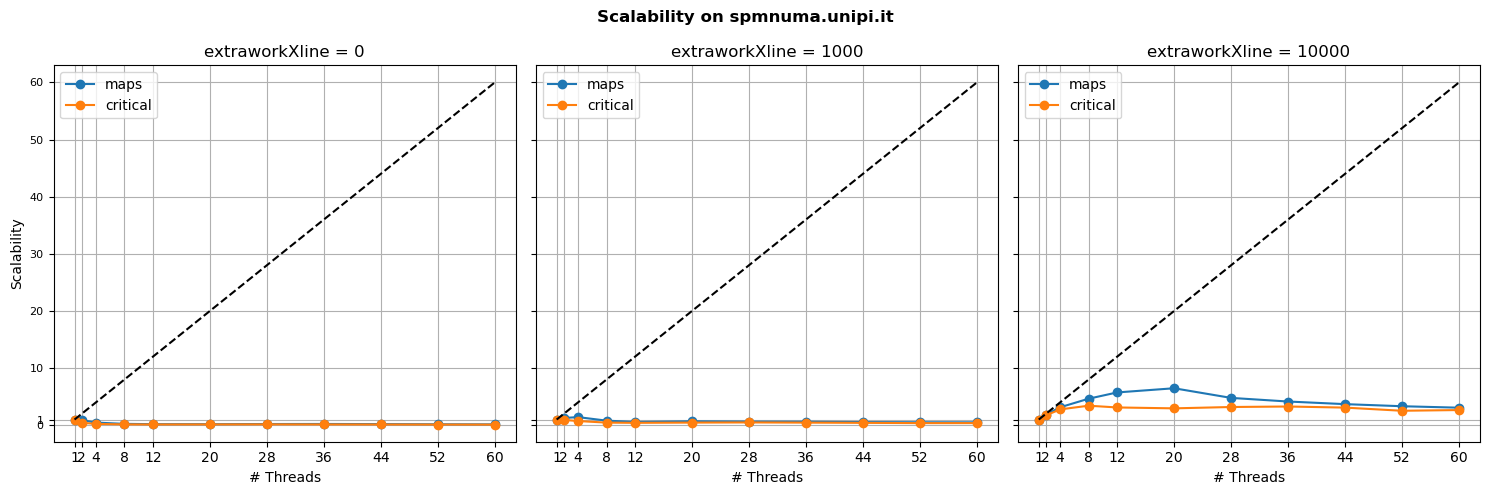

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

maps_0_df.plot(x="T", y="scalability", label="maps", style='o-', ax=axs[0])
critical_0_df.plot(x="T", y="scalability", label="critical", style='o-', ax=axs[0])
axs[0].plot(
    maps_0_df.index.get_level_values("T").to_list(),
    maps_0_df.index.get_level_values("T").to_list(),
    "k--"
)
axs[0].set_xlabel("# Threads")
axs[0].set_ylabel("Scalability")
axs[0].set_xticks(maps_0_df.index.get_level_values("T").to_list());
axs[0].set_yticks(YTICKS);
for label in axs[0].get_yticklabels():
    label.set_fontsize(8)
axs[0].grid()
axs[0].set_title(f"extraworkXline = 0")

maps_1000_df.plot(x="T", y="scalability", label="maps", style='o-', ax=axs[1])
critical_1000_df.plot(x="T", y="scalability", label="critical", style='o-', ax=axs[1])
axs[1].plot(
    maps_1000_df.index.get_level_values("T").to_list(),
    maps_1000_df.index.get_level_values("T").to_list(),
    "k--"
)
axs[1].set_xlabel("# Threads")
axs[1].set_ylabel("Scalability")
axs[1].set_xticks(maps_1000_df.index.get_level_values("T").to_list());
axs[1].set_yticks(YTICKS);
for label in axs[1].get_yticklabels():
    label.set_fontsize(8)
axs[1].grid()
axs[1].set_title(f"extraworkXline = 1000")

maps_10000_df.plot(x="T", y="scalability", label="maps", style='o-', ax=axs[2])
critical_10000_df.plot(x="T", y="scalability", label="critical", style='o-', ax=axs[2])
axs[2].plot(
    maps_10000_df.index.get_level_values("T").to_list(),
    maps_10000_df.index.get_level_values("T").to_list(),
    "k--"
)
axs[2].set_xlabel("# Threads")
axs[2].set_ylabel("Scalability")
axs[2].set_xticks(maps_10000_df.index.get_level_values("T").to_list());
axs[2].set_yticks(YTICKS);
for label in axs[2].get_yticklabels():
    label.set_fontsize(8)
axs[2].grid()
axs[2].set_title(f"extraworkXline = 10000")

fig.suptitle(f"Scalability on {MACHINE}", fontweight="bold")
fig.tight_layout()
fig.savefig(f"img/{MACHINE_TAG}_scalability.png")

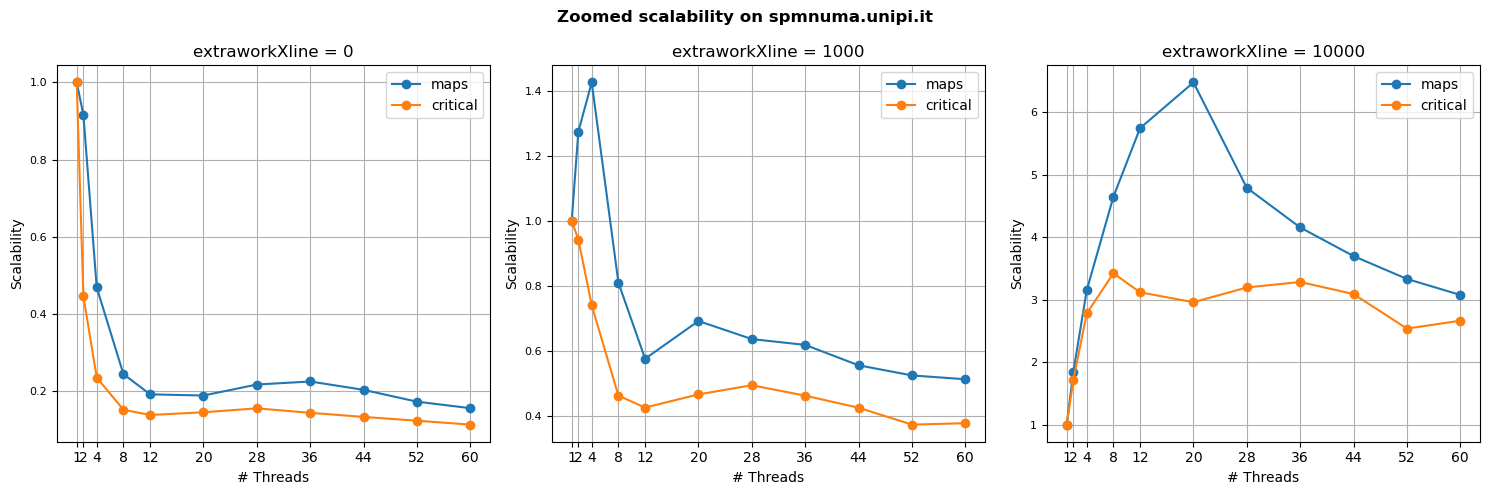

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

maps_0_df.plot(x="T", y="scalability", label="maps", style='o-', ax=axs[0])
critical_0_df.plot(x="T", y="scalability", label="critical", style='o-', ax=axs[0])
axs[0].set_xlabel("# Threads")
axs[0].set_ylabel("Scalability")
axs[0].set_xticks(maps_0_df.index.get_level_values("T").to_list());
for label in axs[0].get_yticklabels():
    label.set_fontsize(8)
axs[0].grid()
axs[0].set_title(f"extraworkXline = 0")

maps_1000_df.plot(x="T", y="scalability", label="maps", style='o-', ax=axs[1])
critical_1000_df.plot(x="T", y="scalability", label="critical", style='o-', ax=axs[1])
axs[1].set_xlabel("# Threads")
axs[1].set_ylabel("Scalability")
axs[1].set_xticks(maps_1000_df.index.get_level_values("T").to_list());
for label in axs[1].get_yticklabels():
    label.set_fontsize(8)
axs[1].grid()
axs[1].set_title(f"extraworkXline = 1000")

maps_10000_df.plot(x="T", y="scalability", label="maps", style='o-', ax=axs[2])
critical_10000_df.plot(x="T", y="scalability", label="critical", style='o-', ax=axs[2])
axs[2].set_xlabel("# Threads")
axs[2].set_ylabel("Scalability")
axs[2].set_xticks(maps_10000_df.index.get_level_values("T").to_list());
for label in axs[2].get_yticklabels():
    label.set_fontsize(8)
axs[2].grid()
axs[2].set_title(f"extraworkXline = 10000")

fig.suptitle(f"Zoomed scalability on {MACHINE}", fontweight="bold")
fig.tight_layout()
fig.savefig(f"img/{MACHINE_TAG}_scalability_zoom.png")

Plotting cost:

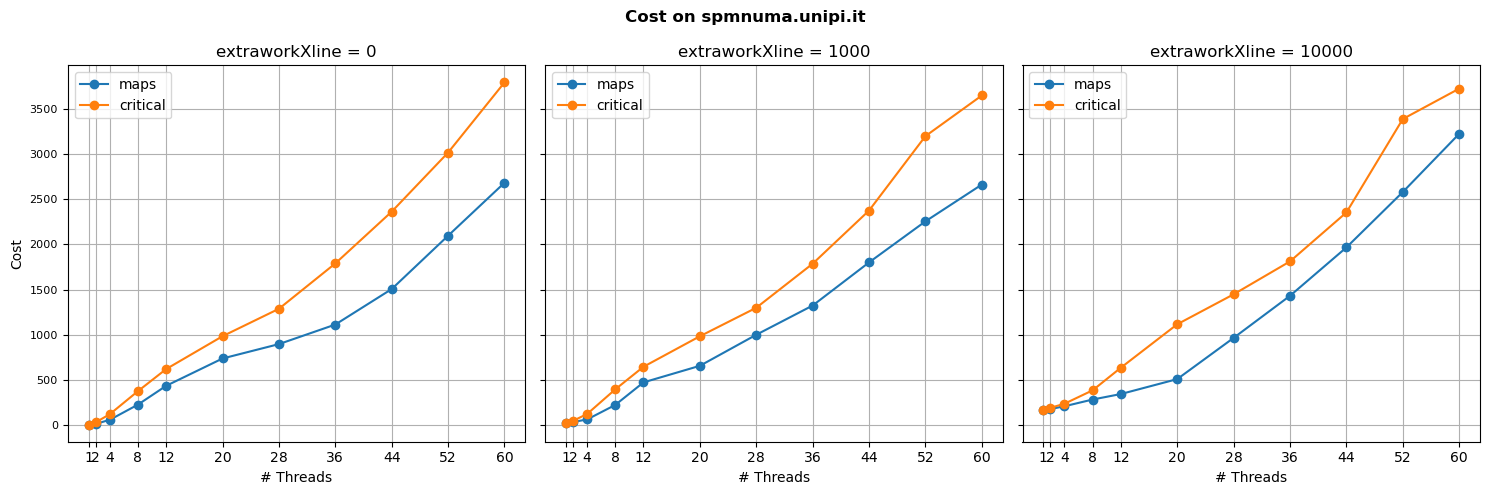

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

maps_0_df.plot(x="T", y="cost", label="maps", style='o-', ax=axs[0])
critical_0_df.plot(x="T", y="cost", label="critical", style='o-', ax=axs[0])
axs[0].set_xlabel("# Threads")
axs[0].set_ylabel("Cost")
axs[0].set_xticks(maps_0_df.index.get_level_values("T").to_list());
for label in axs[0].get_yticklabels():
    label.set_fontsize(8)
axs[0].grid()
axs[0].set_title(f"extraworkXline = 0")

maps_1000_df.plot(x="T", y="cost", label="maps", style='o-', ax=axs[1])
critical_1000_df.plot(x="T", y="cost", label="critical", style='o-', ax=axs[1])
axs[1].set_xlabel("# Threads")
axs[1].set_ylabel("Cost")
axs[1].set_xticks(maps_1000_df.index.get_level_values("T").to_list());
for label in axs[1].get_yticklabels():
    label.set_fontsize(8)
axs[1].grid()
axs[1].set_title(f"extraworkXline = 1000")

maps_10000_df.plot(x="T", y="cost", label="maps", style='o-', ax=axs[2])
critical_10000_df.plot(x="T", y="cost", label="critical", style='o-', ax=axs[2])
axs[2].set_xlabel("# Threads")
axs[2].set_ylabel("Cost")
axs[2].set_xticks(maps_10000_df.index.get_level_values("T").to_list());
for label in axs[2].get_yticklabels():
    label.set_fontsize(8)
axs[2].grid()
axs[2].set_title(f"extraworkXline = 10000")

fig.suptitle(f"Cost on {MACHINE}", fontweight="bold")
fig.tight_layout()
fig.savefig(f"img/{MACHINE_TAG}_cost.png")

Plotting efficiency:

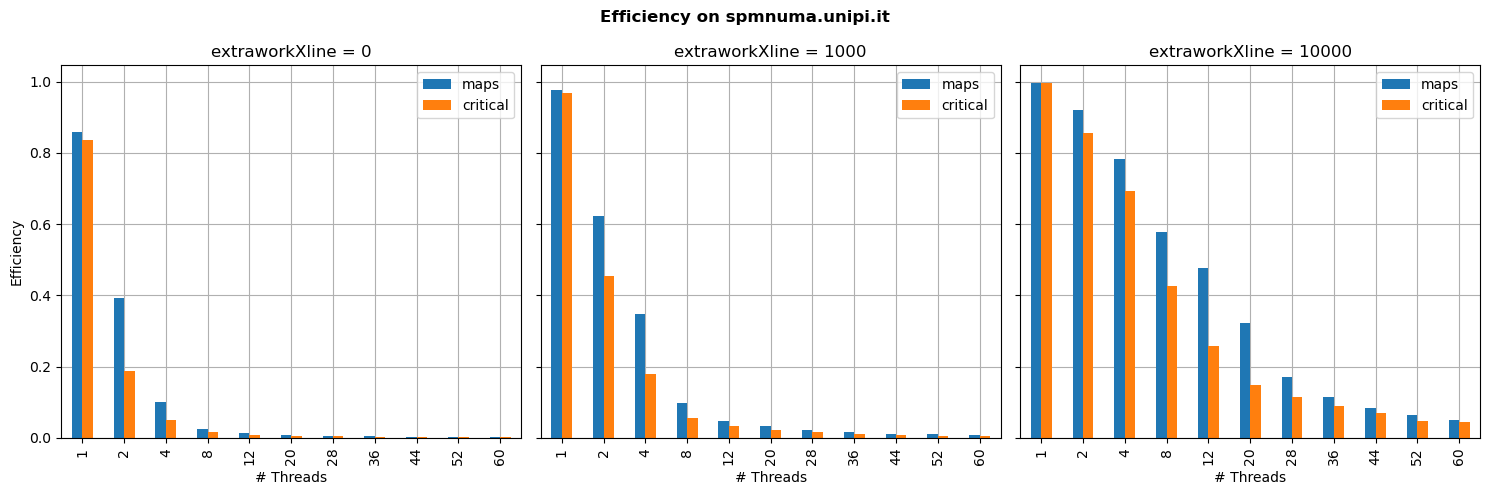

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

maps_0_df.rename(columns={'efficiency': 'maps_efficiency'}, inplace=True)
critical_0_df.rename(columns={'efficiency': 'critical_efficiency'}, inplace=True)
efficiency_0_df = pd.concat(
    [maps_0_df["maps_efficiency"], critical_0_df["critical_efficiency"]],
    axis=1
)
efficiency_0_df.reset_index(inplace=True)
efficiency_0_df.plot.bar(
    x="T", y=["maps_efficiency", "critical_efficiency"],
    label=["maps", "critical"],
    ax=axs[0]
)
axs[0].set_xlabel("# Threads")
axs[0].set_ylabel("Efficiency")
axs[0].set_axisbelow(True)
axs[0].grid()
axs[0].set_title(f"extraworkXline = 0")

maps_1000_df.rename(columns={'efficiency': 'maps_efficiency'}, inplace=True)
critical_1000_df.rename(columns={'efficiency': 'critical_efficiency'}, inplace=True)
efficiency_1000_df = pd.concat(
    [maps_1000_df["maps_efficiency"], critical_1000_df["critical_efficiency"]],
    axis=1
)
efficiency_1000_df.reset_index(inplace=True)
efficiency_1000_df.plot.bar(
    x="T", y=["maps_efficiency", "critical_efficiency"],
    label=["maps", "critical"],
    ax=axs[1]
)
axs[1].set_xlabel("# Threads")
axs[1].set_ylabel("Efficiency")
axs[1].set_axisbelow(True)
axs[1].grid()
axs[1].set_title(f"extraworkXline = 1000")

maps_10000_df.rename(columns={'efficiency': 'maps_efficiency'}, inplace=True)
critical_10000_df.rename(columns={'efficiency': 'critical_efficiency'}, inplace=True)
efficiency_10000_df = pd.concat(
    [maps_10000_df["maps_efficiency"], critical_10000_df["critical_efficiency"]],
    axis=1
)
efficiency_10000_df.reset_index(inplace=True)
efficiency_10000_df.plot.bar(
    x="T", y=["maps_efficiency", "critical_efficiency"],
    label=["maps", "critical"],
    ax=axs[2]
)
axs[2].set_xlabel("# Threads")
axs[2].set_ylabel("Efficiency")
axs[2].set_axisbelow(True)
axs[2].grid()
axs[2].set_title(f"extraworkXline = 10000")

fig.suptitle(f"Efficiency on {MACHINE}", fontweight="bold")
fig.tight_layout()
fig.savefig(f"img/{MACHINE_TAG}_efficiency.png")